# ФІНАЛЬНИЙ ПРОЄКТ ПО СПЕЦІАЛЬНОСТІ "DATA SCIENCE" СЛУХАЧА КУРСУ ПАВЛА ЯТЛУКА 

# ТЕМА: СТВОРЕННЯ МОДЕЛІ МАШИННОГО НАВЧАННЯ ДЛЯ ПРОГНОЗУВАННЯ ЦІНИ НА ЖИТЛО.


## ЕТАПИ РОЗРОБКИ.

## 1. ЗБІР ТА ПОПЕРЕДНЯ ОБРОБКА ДАНИХ.

In [1]:
# імпорт необхідних бібліотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as puplot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

## 1.1. Визначення джерел даних.

### В якості джерела даних було обрано сайт Kaggle.com

## 1.2. Збір та завантаження даних.

In [2]:
# завантаження датасету
train_data = pd.read_csv(r"C:\projects sta\pythonProject\Final Project of DS\3 files\train.csv")
train_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


### ОПИС КОЛОНОК

#### POSTED_BY - хто продає/являється власником нерухомості
#### UNDER_CONSTRUCTION - будується чи вже побудовано
#### RERA - під наглядом спеціального органу контролю нерухомості чи ні
#### BHK_NO	- кількість кімнат
#### BHK_OR_RK - батокімнатна квартира чи апартаменти (кімната та кухня)
#### SQUARE_FT - загальна площа квартири у квадратних футах
#### READY_TO_MOVE - готова для заселення чи ні
#### RESALE - перепродаж нерухомості чи ні
#### ADDRESS	- адреса нерухомості
#### LONGITUDE - координата географічної довготи адреси
#### LATITUDE - координата географічної широти адреси
#### TARGET(PRICE_IN_LACS) - ціна пропозиції

## 1.3. Оцінка якості даних та попередня обробка (видалення дублікатів, заповнення пропущених значень, аналіз викидів, тощо).

In [3]:
# перейменування колонок BHK_NO. та TARGET(PRICE_IN_LACS)
train_data.rename(columns = {'BHK_NO.':'BHK_NO', 'TARGET(PRICE_IN_LACS)':'PRICE'}, inplace = True)
train_data.head(1)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.96991,77.59796,55.0


In [4]:
# видалення колонки ADDRESS
train_data = train_data.drop(['ADDRESS'],  axis=1)
train_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,12.900150,80.227910,67.0


In [5]:
# загальний огляд датасету
train_data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [6]:
# перевірка на заповненість колонок
train_data.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO                0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
LONGITUDE             0
LATITUDE              0
PRICE                 0
dtype: int64

In [7]:
# інформація про тип даних колонок
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           29451 non-null  object 
 1   UNDER_CONSTRUCTION  29451 non-null  int64  
 2   RERA                29451 non-null  int64  
 3   BHK_NO              29451 non-null  int64  
 4   BHK_OR_RK           29451 non-null  object 
 5   SQUARE_FT           29451 non-null  float64
 6   READY_TO_MOVE       29451 non-null  int64  
 7   RESALE              29451 non-null  int64  
 8   LONGITUDE           29451 non-null  float64
 9   LATITUDE            29451 non-null  float64
 10  PRICE               29451 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 2.5+ MB


In [8]:
# аналіз категорійності даних по колонкам
columns = train_data.columns
for col in columns:
    print(train_data[col].value_counts())
    print('*' * 30)

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64
******************************
0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64
******************************
0    20088
1     9363
Name: RERA, dtype: int64
******************************
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
20        4
10        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: BHK_NO, dtype: int64
******************************
BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64
******************************
1000.000000    479
1250.000000    294
800.000000     202
1200.000000    179
1600.000000    125
              ... 
1685.097420      1
1085.176085      1
1300.142248      1
911.002102       1
896.774194       1
Name: SQUARE_FT, Length: 19561, dtype: int64
******************************
1    24157
0     5294
Name: READY_TO_MOVE, dtype: int64
******************************
1    2737

In [9]:
# усунення викідів по площі шляхом видалення записів більше 3000 та менше 10 квадратних футів
train_data = train_data[(train_data.SQUARE_FT < 3000) & (train_data.SQUARE_FT > 10)]
train_data.SQUARE_FT.value_counts()

1000.000000    479
1250.000000    294
800.000000     202
1200.000000    179
1600.000000    125
              ... 
2560.124127      1
1290.159373      1
1272.009715      1
1231.135822      1
896.774194       1
Name: SQUARE_FT, Length: 18649, dtype: int64

In [10]:
# усунення викідів по кількості кімнат шляхом видалення записів більше 6 кімнат
train_data = train_data[train_data.BHK_NO < 7]
train_data.BHK_NO.value_counts()

2    13235
3    10344
1     3549
4     1148
5       64
6       15
Name: BHK_NO, dtype: int64

In [11]:
# усунення викідів по ціні шляхом видалення записів більше 400 лахів та менше 20 лахів
train_data = train_data[(train_data.PRICE < 400) & (train_data.PRICE > 20)]
train_data.PRICE.value_counts()

110.00    783
100.00    760
120.00    644
130.00    582
45.00     576
         ... 
98.40       1
96.60       1
92.30       1
38.79       1
69.40       1
Name: PRICE, Length: 817, dtype: int64

In [12]:
# перетворення значень колонки 'POSTED_BY' до цифрового формату
col = 'POSTED_BY'
condition = [train_data['POSTED_BY'] == 'Dealer', train_data['POSTED_BY'] == 'Owner', train_data['POSTED_BY'] == 'Builder']
choices = [0, 1, 2]
train_data['POSTED_BY'] = np.select(condition, choices, default=0)
train_data.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE
0,1,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0
2,1,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0
3,1,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5
4,0,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5
5,1,0,0,3,BHK,1250.000000,1,1,10.033280,76.282571,42.0
6,0,0,0,3,BHK,1495.053957,1,1,26.916347,75.795600,66.5
7,1,0,1,3,BHK,1181.012946,1,1,30.740000,76.650000,52.0
8,0,0,1,2,BHK,1040.000000,1,1,13.054202,77.674002,41.6
9,1,0,1,2,BHK,879.120879,1,1,12.951610,80.140970,36.0


In [13]:
# перетворення значень колонки 'BHK_OR_RK' до цифрового формату
col = 'BHK_OR_RK'
condition = [train_data['BHK_OR_RK'] == 'BHK', train_data['BHK_OR_RK'] == 'RK']
choices = [0, 1]
train_data['BHK_OR_RK'] = np.select(condition, choices, default=0)
train_data.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE
0,1,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0
2,1,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0
3,1,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5
4,0,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5
5,1,0,0,3,0,1250.000000,1,1,10.033280,76.282571,42.0
6,0,0,0,3,0,1495.053957,1,1,26.916347,75.795600,66.5
7,1,0,1,3,0,1181.012946,1,1,30.740000,76.650000,52.0
8,0,0,1,2,0,1040.000000,1,1,13.054202,77.674002,41.6
9,1,0,1,2,0,879.120879,1,1,12.951610,80.140970,36.0


In [14]:
# аналіз наявності дублікатів записів
duplicateRows = train_data[train_data.duplicated()]
duplicateRows

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE
827,0,0,0,2,0,1050.019091,1,1,19.256471,72.868815,110.0
1904,0,1,0,3,0,1209.628644,0,1,22.541110,88.337780,100.0
1945,0,1,1,1,0,620.051512,0,1,19.222101,72.988231,65.0
2049,0,0,0,1,0,655.021834,1,1,18.973908,73.025106,45.0
2130,0,0,0,3,0,1150.006900,1,1,19.058710,72.899690,250.0
...,...,...,...,...,...,...,...,...,...,...,...
29345,0,1,1,3,0,1563.155686,0,1,30.684523,76.691728,74.5
29357,1,0,1,3,0,1446.201311,1,1,28.596320,77.381430,75.0
29389,2,1,0,3,0,979.290979,0,0,22.747639,88.600902,27.9
29401,0,0,0,2,0,556.818709,1,1,19.256471,72.868815,120.0


In [15]:
# видалення дублікатів
train_data.drop_duplicates(inplace=True)
train_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE
0,1,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0
2,1,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0
3,1,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5
4,0,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...
29445,1,0,0,2,0,1062.134891,1,1,15.866670,74.500000,40.0
29446,1,0,0,3,0,2500.000000,1,1,27.140626,78.043277,45.0
29448,0,0,0,2,0,1022.641509,1,1,26.928785,75.828002,27.1
29449,1,0,0,2,0,927.079009,1,1,12.900150,80.227910,67.0


## 2. ДОСЛІДЖЕННЯ ДАНИХ.

## 2.1. Аналіз даних та виявлення залежностей між ознаками.

In [16]:
# імпорт Pandas Profiling
import ydata_profiling as yp

In [17]:
# запуск аналізу даних за допомогою Pandas Profiling
profile = yp.ProfileReport(train_data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot: >

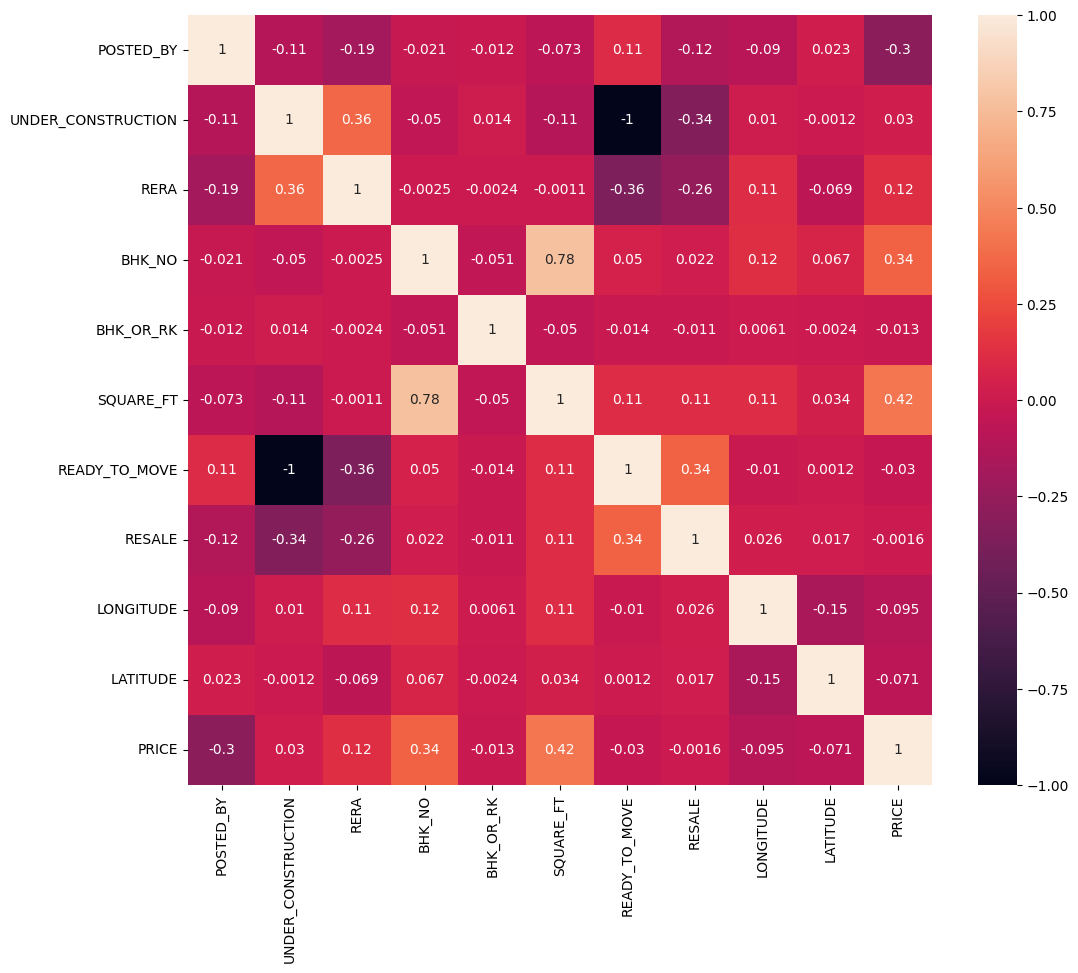

In [18]:
# теплова матриця кореляції
plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(), annot=True)

## 2.2. Візуалізація даних.

array([[<AxesSubplot: title={'center': 'POSTED_BY'}>,
        <AxesSubplot: title={'center': 'UNDER_CONSTRUCTION'}>,
        <AxesSubplot: title={'center': 'RERA'}>],
       [<AxesSubplot: title={'center': 'BHK_NO'}>,
        <AxesSubplot: title={'center': 'BHK_OR_RK'}>,
        <AxesSubplot: title={'center': 'SQUARE_FT'}>],
       [<AxesSubplot: title={'center': 'READY_TO_MOVE'}>,
        <AxesSubplot: title={'center': 'RESALE'}>,
        <AxesSubplot: title={'center': 'LONGITUDE'}>],
       [<AxesSubplot: title={'center': 'LATITUDE'}>,
        <AxesSubplot: title={'center': 'PRICE'}>, <AxesSubplot: >]],
      dtype=object)

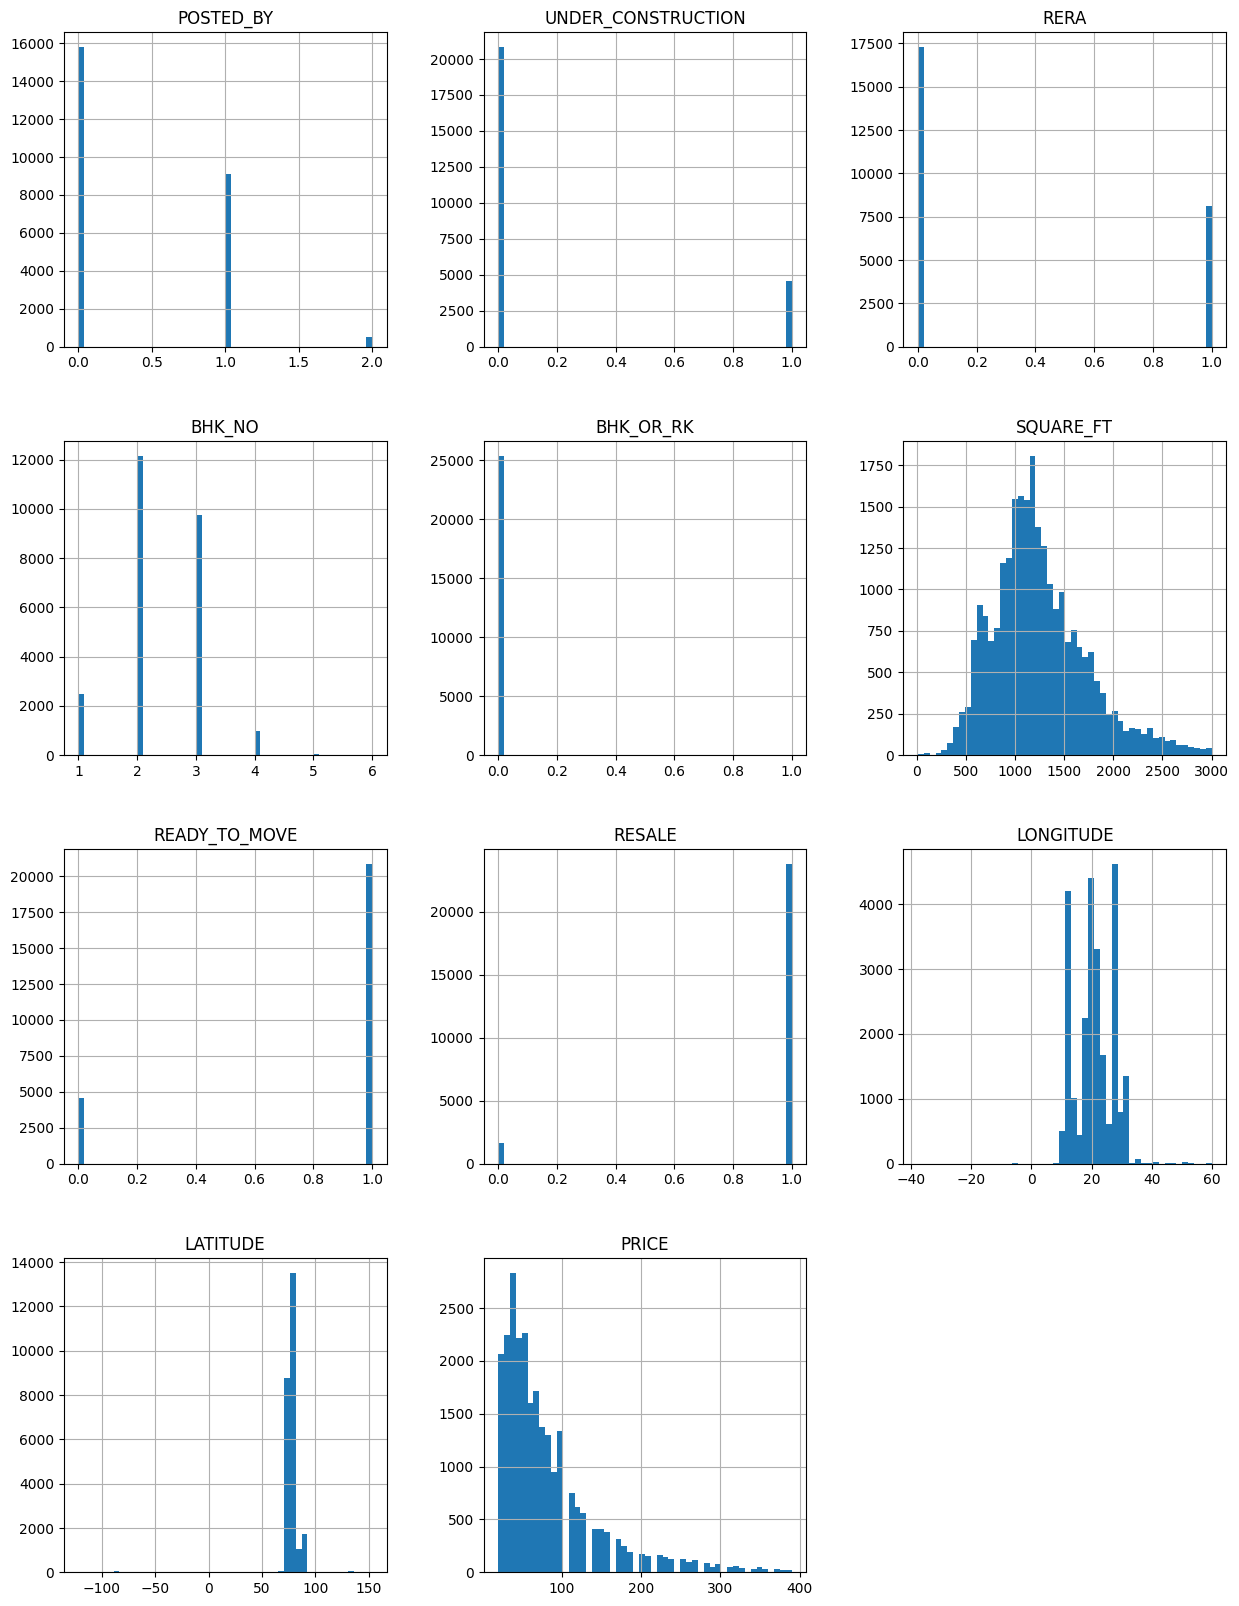

In [19]:
train_data.hist(bins=50,figsize=(15,20))

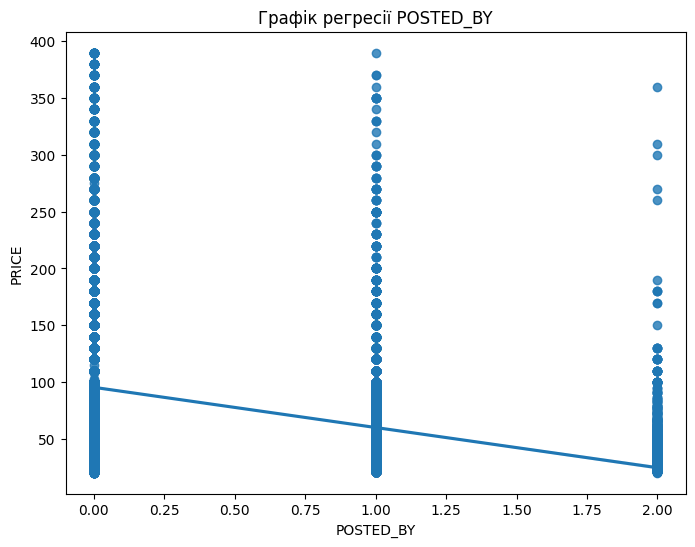

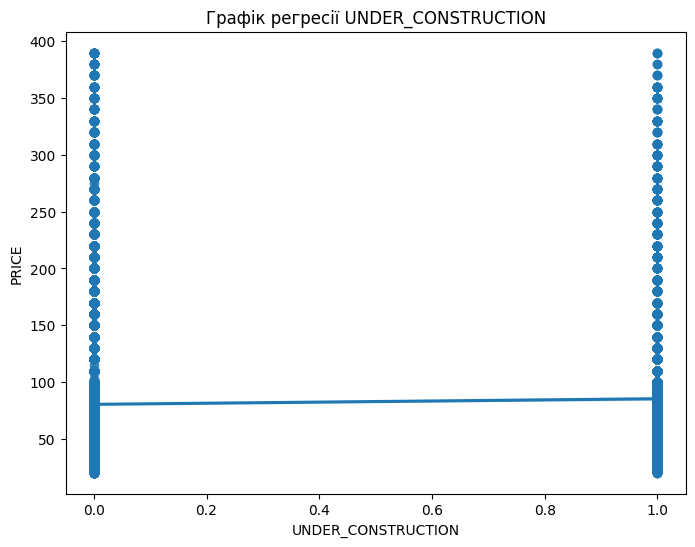

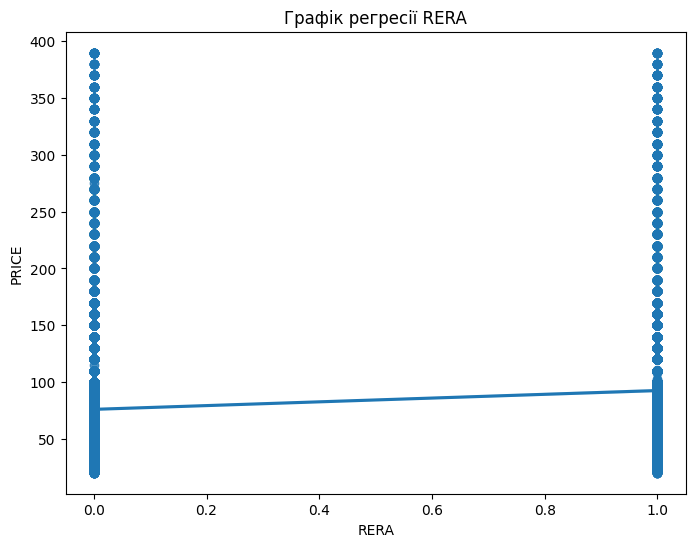

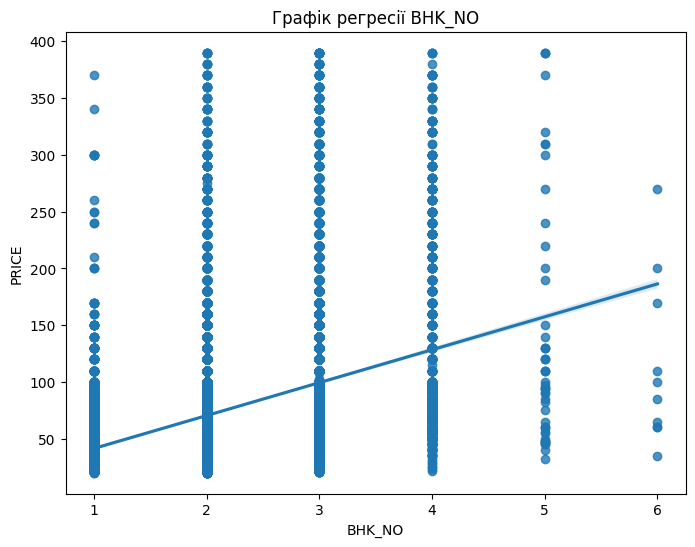

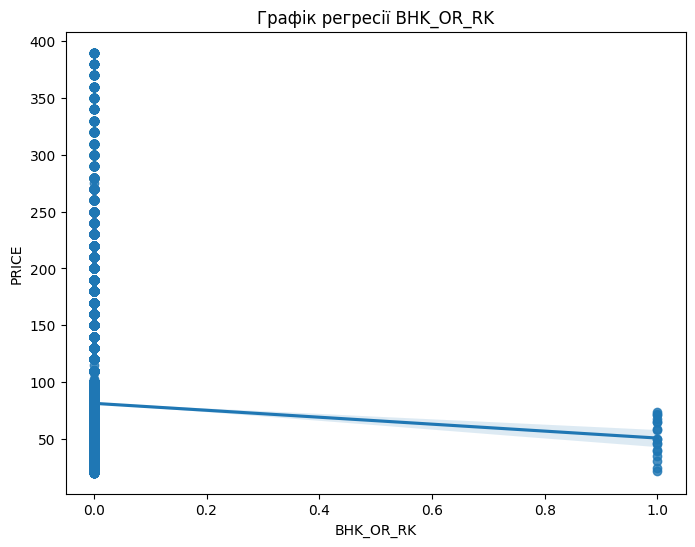

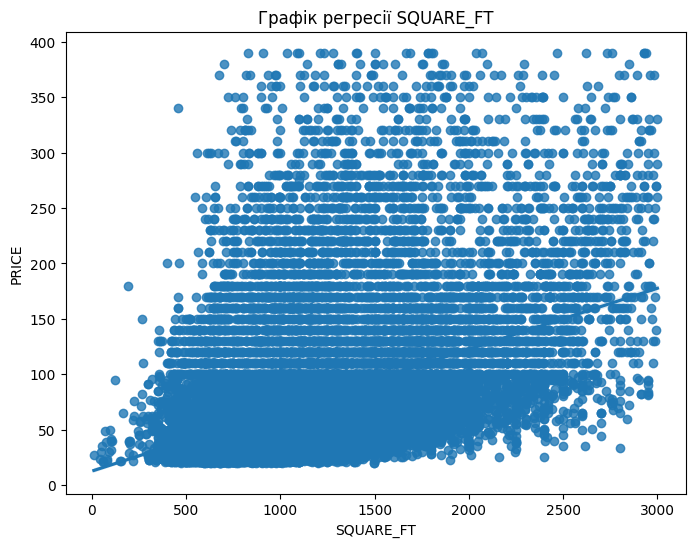

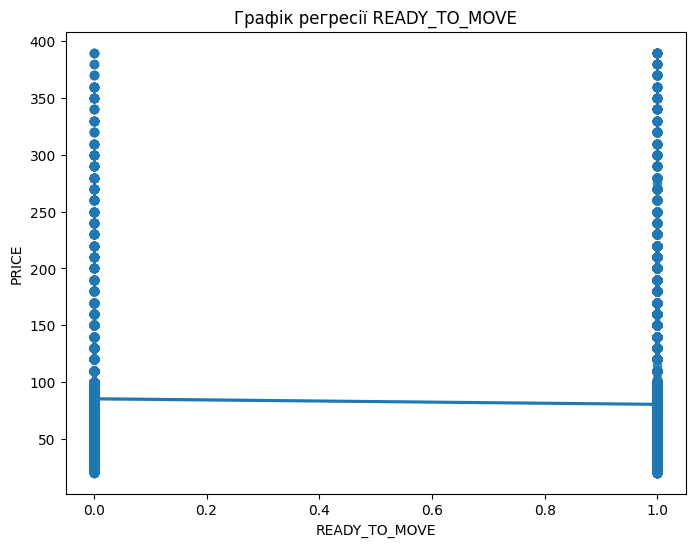

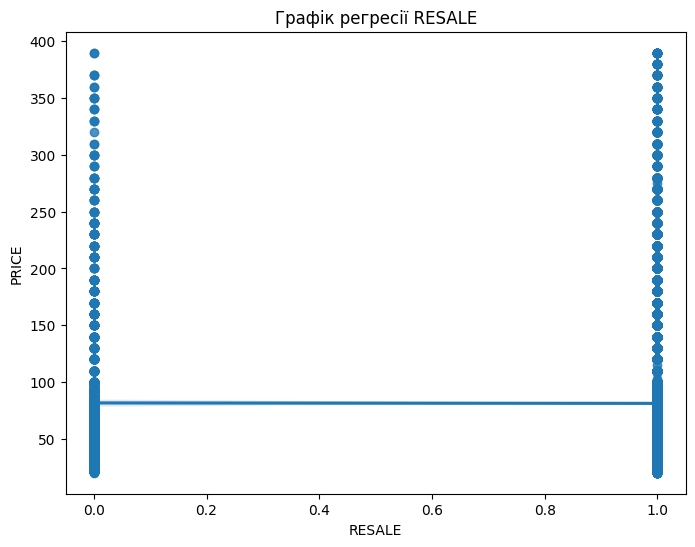

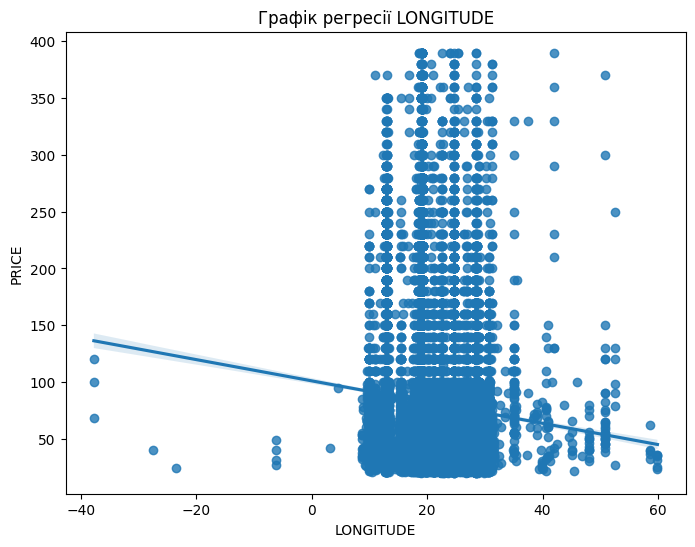

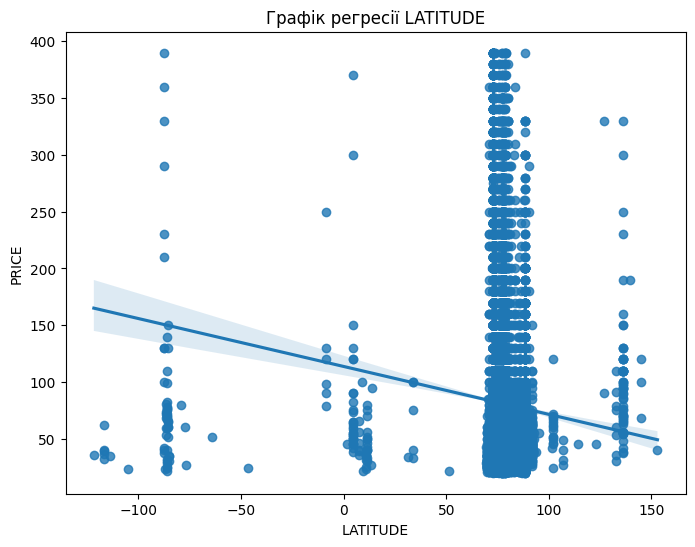

In [20]:

variables = ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO', 'BHK_OR_RK', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE']
for var in variables:
    plt.figure(figsize=(8, 6), dpi=100)
    sns.regplot(x=var, y='PRICE', data=train_data).set(title=f'Графік регресії {var}')

## 2.3. Визначення значущих ознак та вибір методу кодування.

In [21]:
# аналіз кореляції даних
train_data.corr()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE
POSTED_BY,1.000000,-0.105398,-0.189040,-0.020887,-0.011664,-0.073308,0.105398,-0.120086,-0.089809,0.023497,-0.302941
UNDER_CONSTRUCTION,-0.105398,1.000000,0.363049,-0.050437,0.014443,-0.113886,-1.000000,-0.342249,0.010276,-0.001199,0.030351
RERA,-0.189040,0.363049,1.000000,-0.002509,-0.002395,-0.001136,-0.363049,-0.257525,0.110321,-0.069386,0.124811
BHK_NO,-0.020887,-0.050437,-0.002509,1.000000,-0.050564,0.776628,0.050437,0.022199,0.122611,0.066990,0.338435
BHK_OR_RK,-0.011664,0.014443,-0.002395,-0.050564,1.000000,-0.050282,-0.014443,-0.011175,0.006063,-0.002366,-0.013161
SQUARE_FT,-0.073308,-0.113886,-0.001136,0.776628,-0.050282,1.000000,0.113886,0.112709,0.113162,0.034208,0.422741
READY_TO_MOVE,0.105398,-1.000000,-0.363049,0.050437,-0.014443,0.113886,1.000000,0.342249,-0.010276,0.001199,-0.030351
RESALE,-0.120086,-0.342249,-0.257525,0.022199,-0.011175,0.112709,0.342249,1.000000,0.025538,0.017225,-0.001555
LONGITUDE,-0.089809,0.010276,0.110321,0.122611,0.006063,0.113162,-0.010276,0.025538,1.000000,-0.153166,-0.095364
LATITUDE,0.023497,-0.001199,-0.069386,0.066990,-0.002366,0.034208,0.001199,0.017225,-0.153166,1.000000,-0.071269


In [22]:
# модель фінального датасету
final_train_data = train_data.drop(['RERA', 'BHK_OR_RK', 'READY_TO_MOVE', 'RESALE'], axis=1)
final_train_data.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,BHK_NO,SQUARE_FT,LONGITUDE,LATITUDE,PRICE
0,1,0,2,1300.236407,12.969910,77.597960,55.0
1,0,0,2,1275.000000,12.274538,76.644605,51.0
2,1,0,2,933.159722,12.778033,77.632191,43.0
3,1,0,2,929.921143,28.642300,77.344500,62.5
4,0,1,2,999.009247,22.592200,88.484911,60.5


In [23]:
# збереження фінального датасету
final_train_data.to_csv('final_train_data.csv')

## 3. ПОБУДОВА МОДЕЛІ МАШИННОГО НАВЧАННЯ.

## 3.1. Визначення цільової змінної.

In [24]:
# загрузка збереженого фінального датасету
data = pd.read_csv('final_train_data.csv', index_col=0)

In [25]:
# цільова змінна
y = data['PRICE']

## 3.2. Вибір алгоритму машинного навчання.

### LinearRegression, DecisionTreeRegressor, XGBRegressor

## 3.3. Підбір гіперпараметрів.

In [26]:
X = data[['POSTED_BY', 'UNDER_CONSTRUCTION', 'BHK_NO', 'SQUARE_FT', 'LONGITUDE', 'LATITUDE']]
y = data['PRICE']

## 3.4. Розбиття даних на навчальну та тестову вибірки.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.2,random_state=42)

## 3.5. Навчання моделі на тренувальній вибірці.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [30]:
lin_regression = LinearRegression()
lin_regression.fit(X_train, y_train)

LinearRegression()

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
from xgboost import XGBRegressor

In [34]:
xg = XGBRegressor(booster = 'gbtree', learning_rate=0.02, n_estimators=5000)
xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=5000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

## 4. ІНТЕРПРИТАЦІЯ РЕЗУЛЬТАТІВ ТА ВІЗУАЛІЗАЦІЯ.

## 4.1. Оцінка якості моделі.

### оцінка якості за допомогою sklearn model.score(X,y) на основі коефіцієнту детермінації -  R^2 

In [35]:
lin_regression.score(X_train,y_train)

0.2933458836839631

In [36]:
lin_regression.score(X_test,y_test)

0.3125293939669197

In [37]:
dtr.score(X_train, y_train)

0.9983339893087708

In [38]:
dtr.score(X_test, y_test)

0.5679964293547384

In [39]:
xg.score(X_train,y_train)

0.9282383523323718

In [40]:
xg.score(X_test,y_test)

0.8046342040032135

### оцінка якості за допомогою sklearn - середня абсолютна похибка, середняквадратична похибка та квадратний корінь із середньоквадратичної похибки

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
y_pred_lin_reg = lin_regression.predict(X_test)

In [50]:
y_pred_dtr = dtr.predict(X_test)

In [51]:
y_pred_xg = xg.predict(X_test)

In [52]:
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
rmse_lin_reg = np.sqrt(mse_lin_reg)

In [53]:
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)

In [54]:
mae_xg = mean_absolute_error(y_test, y_pred_xg)
mse_xg = mean_squared_error(y_test, y_pred_xg)
rmse_xg = np.sqrt(mse_xg)

#### візуалізація отриманих оцінок

In [55]:
print(f"Mean absolute error_lin_reg: {mae_lin_reg:.2f}")
print(f"Mean squared error_lin_reg: {mse_lin_reg:.2f}")
print(f"Mean mean squared error_lin_reg: {rmse_lin_reg:.2f}")

Mean absolute error_lin_reg: 34.86
Mean squared error_lin_reg: 2497.64
Mean mean squared error_lin_reg: 49.98


In [56]:
print(f"Mean absolute error_dtr: {mae_dtr:.2f}")
print(f"Mean squared error_dtr: {mse_dtr:.2f}")
print(f"Mean mean squared error_dtr: {rmse_dtr:.2f}")

Mean absolute error_dtr: 22.04
Mean squared error_dtr: 1569.50
Mean mean squared error_dtr: 39.62


In [57]:
print(f"Mean absolute error_xg: {mae_xg:.2f}")
print(f"Mean squared error_xg: {mse_xg:.2f}")
print(f"Mean mean squared error_xg: {rmse_xg:.2f}")

Mean absolute error_xg: 15.96
Mean squared error_xg: 709.78
Mean mean squared error_xg: 26.64


## 4.2. Візуалізація результатів та інтерпритація.

In [90]:
# прогнозні значення по результатам XGB Regression
y_pred_xg = xg.predict(X_test)
result = pd.DataFrame({"Actual" : y_test, "Predicted": y_pred_xg})
result

,Actual,Predicted
18769,36.0,48.277584
14938,100.0,94.515678
2372,46.0,59.138657
6426,140.0,193.464523
24251,43.2,46.263622
...,...,...
8351,42.0,48.397713
28216,45.0,50.468082
7363,50.0,39.148842
9002,88.3,84.313866


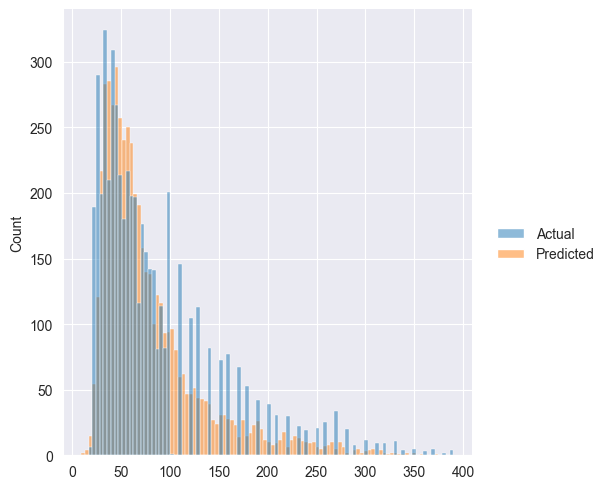

In [134]:
# візуалізація фактичних і прогнозних значень по результатам роботи XGB Regression
sns.displot(data=result, bins=100)
plt.show()

## 5. СТВОРЕННЯ ЗВІТУ.

## 5.1. Опис процесу розробки моделі та  вибору методів машинного навчання.

### Даний проект виконаний як фінальний по курсу навчання Data Science начальної платформи StudyUA. Процес розробки проходив згідно запропонованому плану, в саме,
### 1. Збір та попередня обробка даних.
### 2. Дослідження даних.
### 3. Побудова моделі машинного навчання.
### 4. Інтерпритація та візуалізація. 
### 5. Створення звіту.
### Було обрано датасет сайту Kaggle -  дані по ринку нерухомості Індії. Датасет містить більше 29 тисяч записі в 12 колонках. Після дослідження даних було прийнято рішення побудовати прогноз на основі колонок - POST_BY,  Under_Construction, BHK_NO,  Longitude,  Lattitude,  Squere.  В якості моделі машинного навчання було обрано три регрессії - LinReg, TDReg, XGBReg. Після розбиття бази на тренувальну та тестову та навчання моделі, були отримані прогнозні дані з метриками, які показали що накращий результат отрмано за допомогою XGBReg. Були отримані ціфрові та графічні результати предикції, та зроблений відповідний висновок.

## 5.2. Представлення результатів та аналіз отриманих даних.

In [120]:
fanal_result = pd.read_excel(r'Result_Score.xlsx', index_col = 0)
fanal_result

,"R^2, train","R^2, test",mae,mse,rmse
Linear Regression,0.2933,0.3125,34.86,2497.64,49.98
Tree Desission Regression,0.9983,0.5679,22.04,1569.50,39.62
XGB Regression,0.9282,0.8046,15.96,709.78,26.64


## ВИСНОВОК

### Розроблена модель машинного навчання для прогнозування цін на житло на основі даних датасету по нерухомості Індії показала найкращі результати при застосуванні регрессії XGB Regression з показником score = 0.8046